In [1]:
import sys
sys.path.append("/usr/local/lib/python3.8/dist-packages/")
sys.path.append("../")

from PIL import Image
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import snook.data.blender as blender
import snook.data.dataset as dataset
import snook.data.generator as generator
import torch

In [2]:
blender.excomuniate_default_cube()

colors = generator.COLORS
balls  = [f"../resources/fbx/ball_{color}.fbx" for color in colors]
cue    = "../resources/fbx/cue.fbx"
pool   = "../resources/fbx/pool.fbx"
hdri   = "../resources/hdri"

scene = generator.Scene(
    generator.cFiles(balls, cue, pool, hdri),
    generator.cTable((2.07793, 1.03677), (0.25, 0.20), 1.70342),
    generator.cDistances(0.1, 1.5, (10.0, 20.0)),
)

os.makedirs("renders", exist_ok=True)
os.makedirs("data", exist_ok=True)
for i in tqdm(range(2), desc="Generating"):
    scene.sample()
    scene.render(f"renders/{i}.png")
    scene.register(f"data/{i}.txt")

FBX Import: start importing ../resources/fbx/ball_black.fbx
FBX version: 7400
	FBX import: Prepare...
		Done (0.000279 sec)

	FBX import: Templates...
		Done (0.000232 sec)

	FBX import: Nodes...
		Done (0.000073 sec)

	FBX import: Connections...
		Done (0.000070 sec)

	FBX import: Meshes...
		Done (0.015050 sec)

	FBX import: Materials & Textures...
		Done (0.009011 sec)

	FBX import: Cameras & Lamps...
		Done (0.000133 sec)

	FBX import: Objects & Armatures...
		Done (0.000311 sec)

	FBX import: ShapeKeys...
		Done (0.000053 sec)

	FBX import: Animations...
		Done (0.000264 sec)

	FBX import: Assign materials...
		Done (0.000108 sec)

	FBX import: Assign textures...
		Done (0.005471 sec)

	FBX import: Cycles z-offset workaround...
		Done (0.000060 sec)

	Done (0.034992 sec)

Import finished.
FBX Import: start importing ../resources/fbx/ball_black.fbx
FBX version: 7400
	FBX import: Prepare...
		Done (0.001206 sec)

	FBX import: Templates...
		Done (0.000098 sec)

	FBX import: Nodes...

		Done (0.014957 sec)

	FBX import: Materials & Textures...
		Done (0.000412 sec)

	FBX import: Cameras & Lamps...
		Done (0.000048 sec)

	FBX import: Objects & Armatures...
		Done (0.000306 sec)

	FBX import: ShapeKeys...
		Done (0.000046 sec)

	FBX import: Animations...
		Done (0.000122 sec)

	FBX import: Assign materials...
		Done (0.000085 sec)

	FBX import: Assign textures...
		Done (0.000071 sec)

	FBX import: Cycles z-offset workaround...
		Done (0.000065 sec)

	Done (0.020698 sec)

Import finished.
FBX Import: start importing ../resources/fbx/ball_yellow.fbx
FBX version: 7400
	FBX import: Prepare...
		Done (0.000821 sec)

	FBX import: Templates...
		Done (0.000212 sec)

	FBX import: Nodes...
		Done (0.000072 sec)

	FBX import: Connections...
		Done (0.000070 sec)

	FBX import: Meshes...
		Done (0.014822 sec)

	FBX import: Materials & Textures...
		Done (0.000692 sec)

	FBX import: Cameras & Lamps...
		Done (0.000363 sec)

	FBX import: Objects & Armatures...
		Done (0.000914 sec

FBX version: 7400
	FBX import: Prepare...
		Done (0.000751 sec)

	FBX import: Templates...
		Done (0.000208 sec)

	FBX import: Nodes...
		Done (0.000136 sec)

	FBX import: Connections...
		Done (0.000138 sec)

	FBX import: Meshes...
		Done (10.705284 sec)

	FBX import: Materials & Textures...
		Done (0.002858 sec)

	FBX import: Cameras & Lamps...
		Done (0.000164 sec)

	FBX import: Objects & Armatures...
		Done (0.000333 sec)

	FBX import: ShapeKeys...
		Done (0.000131 sec)

	FBX import: Animations...
		Done (0.000143 sec)

	FBX import: Assign materials...
		Done (0.000845 sec)

	FBX import: Assign textures...
		Done (0.001899 sec)

	FBX import: Cycles z-offset workaround...
		Done (0.000070 sec)

	Done (11.258478 sec)

Import finished.


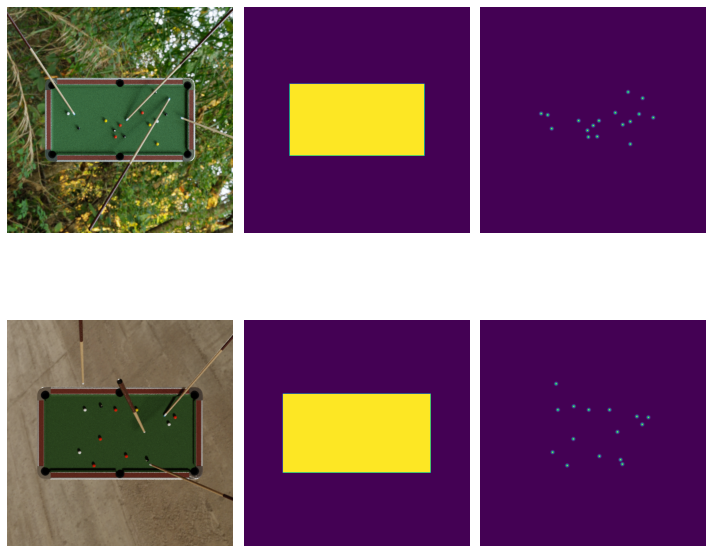

In [5]:
test_set = dataset.ReMaHeDataset("renders", "data", spread=4.0)

plt.figure(figsize=(10, 10))

with torch.no_grad():
    for i, (render, mask, heatmap) in enumerate(test_set):
        render = render.permute((1, 2, 0))
        
        plt.subplot(len(test_set), 3, 3 * i + 1)
        plt.imshow(render)
        plt.axis("off")
        
        plt.subplot(len(test_set), 3, 3 * i + 2)
        plt.imshow(mask)
        plt.axis("off")
        
        plt.subplot(len(test_set), 3, 3 * i + 3)
        plt.imshow(heatmap)
        plt.axis("off")
        
plt.tight_layout()
plt.show()

In [6]:
shutil.rmtree("renders")
shutil.rmtree("data")